In [7]:
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [8]:
digits = load_digits()
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target
df.head(8)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7


In [10]:
X = digits.data
X = StandardScaler().fit_transform(X)
y = digits.target

In [11]:
# choose the number of components
lda = LDA()
X_lda = lda.fit_transform(X,y)
np_cum_lda = np.cumsum(lda.explained_variance_ratio_)
df_cum_lda = pd.DataFrame({'Component':[i for i in range(1,np_cum_lda.shape[0]+1)],'explained_variance_ratio':lda.explained_variance_ratio_,'cum_explained_variance_ratio':np_cum_lda})
print(df_cum_lda)
filter = df_cum_lda[df_cum_lda.cum_explained_variance_ratio>0.8].iloc[0]
component = int(filter.Component)
cum_var = float(filter.cum_explained_variance_ratio)
print(f"\n{component} Discriminant Components explain {round(cum_var,4)*100}% of variability between CLASSES")

   Component  explained_variance_ratio  cum_explained_variance_ratio
0          1                  0.289120                      0.289120
1          2                  0.182628                      0.471748
2          3                  0.169623                      0.641372
3          4                  0.116705                      0.758077
4          5                  0.083013                      0.841090
5          6                  0.065657                      0.906747
6          7                  0.043101                      0.949848
7          8                  0.029326                      0.979174
8          9                  0.020826                      1.000000

5 Discriminant Components explain 84.11% of variability between CLASSES


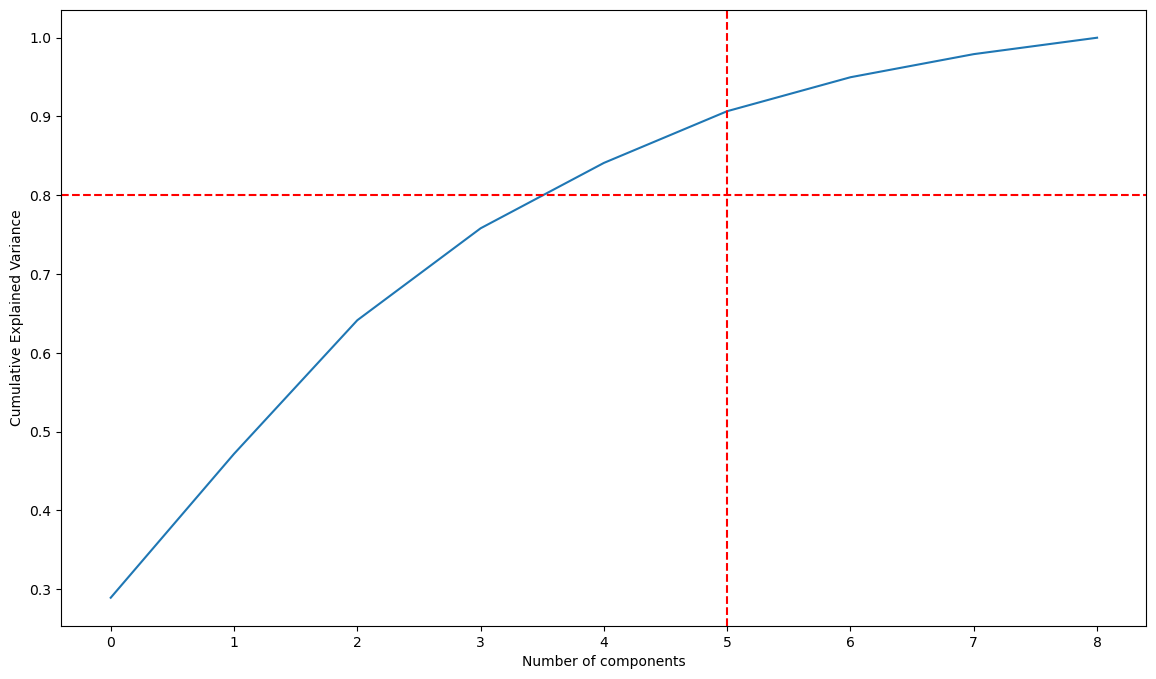

In [12]:
threshold = 0.8
fig = plt.figure(figsize=(14,8))
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance');
plt.axhline(y=threshold, color = 'r', linestyle = '--')
plt.axvline(x=component, color = 'r', linestyle = '--')
plt.show()

In [16]:
# # It seems the optimal number of components is only 5, so we’ll keep those.

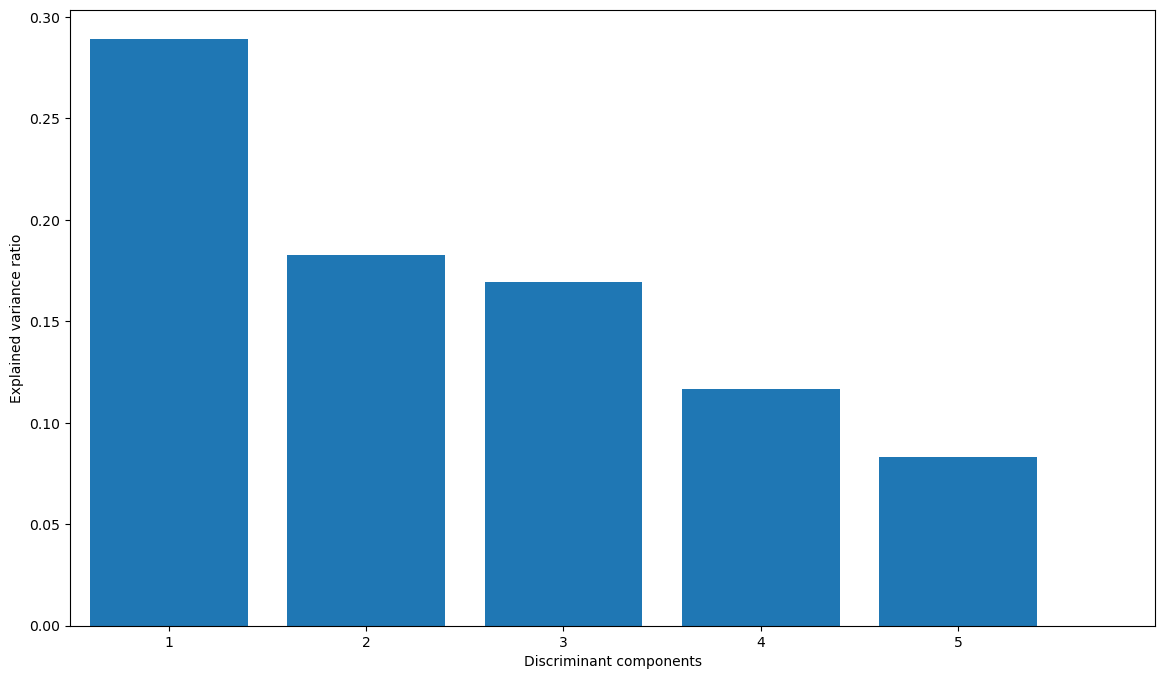

In [17]:
# now, we visualize the contribution of each chosen discriminant components
lda = LDA(n_components=5)
X_lda = lda.fit_transform(X,y)
fig = plt.figure(figsize=(14,8))
plt.bar(range(1,6),lda.explained_variance_ratio_,)
plt.ylabel('Explained variance ratio')
plt.xlabel('Discriminant components')
plt.xlim([0.5,6])
plt.xticks(range(1,6))
plt.show()

 - The first component preserves approximately 30% of the variability between categories, while the second holds less than 20%, and the third – only 17%. Similarly to PCA, the variance decreases with each new component.

/var/folders/wp/s6hl_fl57tnf8_1_ndx9w4hw0000gn/T/ipykernel_32482/4147010520.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


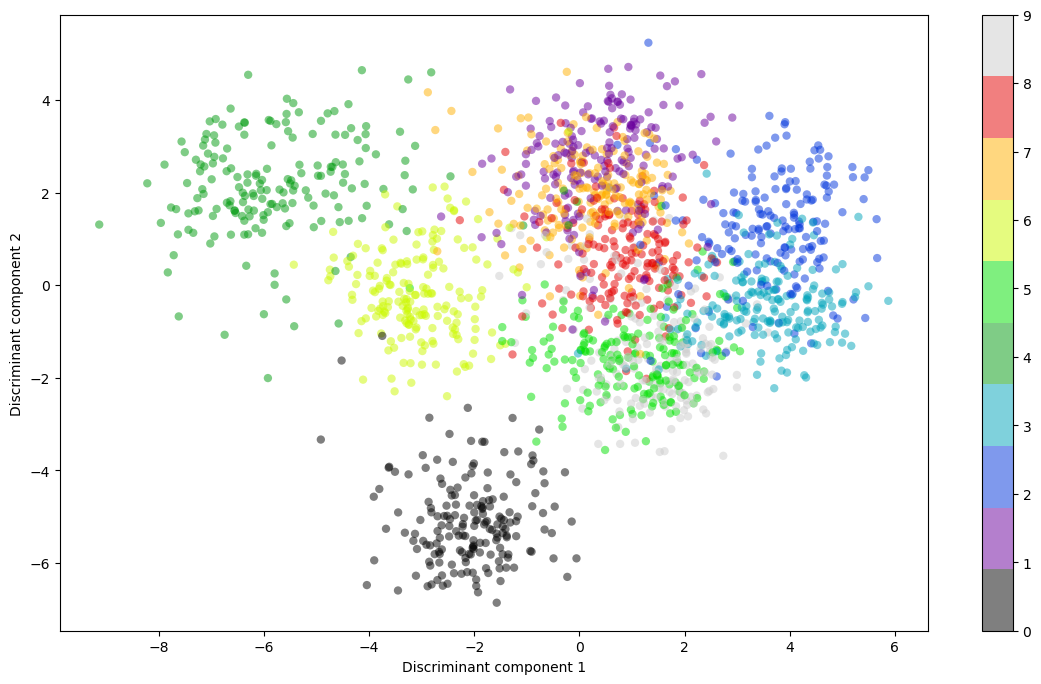

In [14]:
fig = plt.figure(figsize=(14,8))
plt.scatter(X_lda[:, 0], X_lda[:, 1],
           c=digits.target, edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('Discriminant component 1')
plt.ylabel('Discriminant component 2')
plt.colorbar()
plt.show()

/var/folders/wp/s6hl_fl57tnf8_1_ndx9w4hw0000gn/T/ipykernel_32482/603530905.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


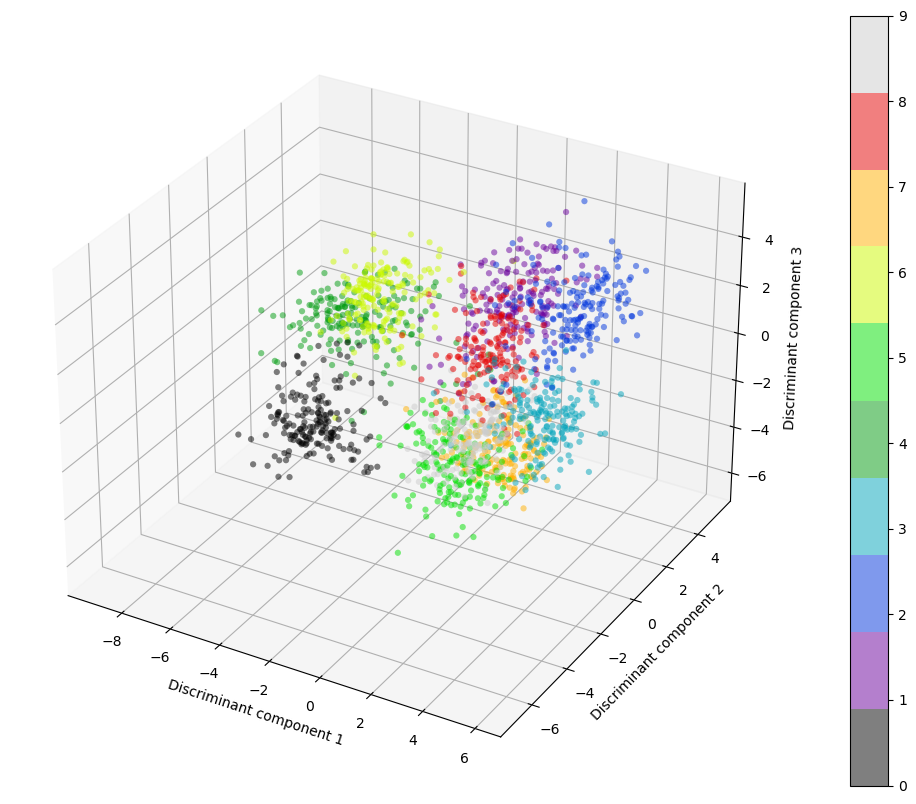

In [15]:
fig = plt.figure(figsize=(18,10))
ax = plt.axes(projection='3d')
p=ax.scatter3D(X_lda[:, 0], X_lda[:, 1],X_lda[:, 2],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
ax.set_xlabel('Discriminant component 1')
ax.set_ylabel('Discriminant component 2')
ax.set_zlabel('Discriminant component 3')
plt.colorbar(p)
plt.show()

# Comment
- From the scatter plot above, the cluster representing the digit 0 is the most separated and easily distinguishable among the others.